In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the function and its gradient
def f(x, y):
    return x**3 + y**3 + x**2 * y + y**2 * x

In [3]:
def gradient(x, y):
    df_dx = 3*x**2 + 2*x*y + y**2
    df_dy = 3*y**2 + 2*y*x + x**2
    return np.array([df_dx, df_dy])

In [4]:
# ADAM optimizer implementation
def adam_optimizer(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=100, tol=1e-6):
    x, y = np.random.randn(), np.random.randn()  # Initialize randomly
    m, v = np.zeros(2), np.zeros(2)
    f_values = []
    
    for t in range(1, max_iter + 1):
        grad = gradient(x, y)
        
        m = beta1 * m + (1 - beta1) * grad  # First moment estimate
        v = beta2 * v + (1 - beta2) * (grad ** 2)  # Second moment estimate
        
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        
        x -= lr * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= lr * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        
        f_values.append(f(x, y))
        
        if np.linalg.norm(grad) < tol:
            break
    
    return f_values

In [5]:
# Run the optimizer
f_vals = adam_optimizer()

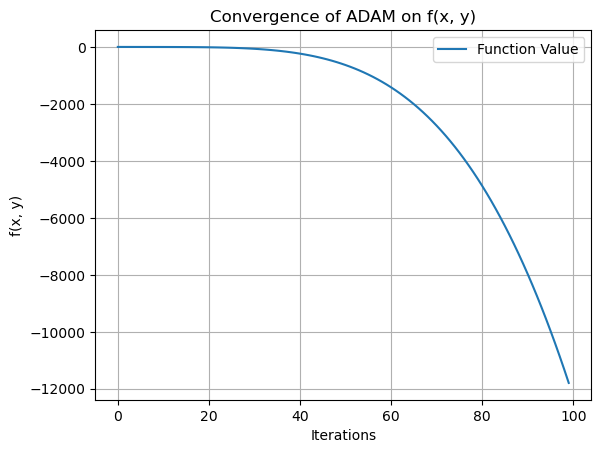

In [6]:
# Plot convergence
plt.plot(f_vals, label='Function Value')
plt.xlabel('Iterations')
plt.ylabel('f(x, y)')
plt.title('Convergence of ADAM on f(x, y)')
plt.legend()
plt.grid()
plt.show()